In [3]:
import pandas as pd
import numpy as np
import imutils
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

import seaborn as sn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [31]:
path = 'C:/Users/Cesar Hooper/Desktop/github/proyecto_MARCELO/bdml2023.xlsx'
path2 = 'C:/Users/Cesar Hooper/Desktop/github/proyecto_MARCELO/bdml2023.xlsx'

In [5]:
datos = pd.read_excel('bdml2023.xlsx')

In [6]:
dataset = datos[6::]
dataset.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
6,2022-01-03,10:20,5,9,11,16,19,21,25,28,31,33,4768.75,-30,-155,NaN,0
7,2022-01-03,10:21,3,9,11,16,19,21,25,28,31,33,4766,-43,-164,-2.75,0
8,2022-01-03,10:22,3,9,11,16,19,21,25,28,31,33,4766.75,-44,-161,-2,0
9,2022-01-03,10:23,3,9,11,16,19,21,25,28,31,33,4768.75,-38,-155,0,0
10,2022-01-03,10:24,3,9,11,16,18,21,25,27,31,33,4771.5,-30,-145,2.75,0


In [7]:
dataset.shape

(9986, 17)

In [8]:
dataset = dataset.dropna()

In [9]:
fecha = dataset['Unnamed: 0']
hora = dataset['Unnamed: 1']

dataset = dataset.drop(['Unnamed: 0', 'Unnamed: 1'], axis=1)

In [10]:
dataset.head(5)

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
7,3,9,11,16,19,21,25,28,31,33,4766,-43,-164,-2.75,0
8,3,9,11,16,19,21,25,28,31,33,4766.75,-44,-161,-2,0
9,3,9,11,16,19,21,25,28,31,33,4768.75,-38,-155,0,0
10,3,9,11,16,18,21,25,27,31,33,4771.5,-30,-145,2.75,0
11,2,9,11,16,18,21,25,27,30,33,4775.25,14,-126,6.5,0


In [11]:
dataset.shape

(9931, 15)

In [12]:
dataset = dataset.apply(pd.to_numeric)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9931 entries, 7 to 9991
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 2   9931 non-null   int64  
 1   Unnamed: 3   9931 non-null   int64  
 2   Unnamed: 4   9931 non-null   int64  
 3   Unnamed: 5   9931 non-null   int64  
 4   Unnamed: 6   9931 non-null   int64  
 5   Unnamed: 7   9931 non-null   int64  
 6   Unnamed: 8   9931 non-null   int64  
 7   Unnamed: 9   9931 non-null   int64  
 8   Unnamed: 10  9931 non-null   int64  
 9   Unnamed: 11  9931 non-null   int64  
 10  Unnamed: 12  9931 non-null   float64
 11  Unnamed: 13  9931 non-null   int64  
 12  Unnamed: 14  9931 non-null   int64  
 13  Unnamed: 15  9931 non-null   float64
 14  Unnamed: 16  9931 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 1.2 MB


In [14]:
# creando modelo
y = dataset['Unnamed: 16']
X = dataset.drop('Unnamed: 16', axis=1)

In [68]:
len(X.columns)

14

In [15]:
# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [16]:
# Vamos a escalar los datos. 
# Crea el objeto y fitea
scaler = StandardScaler()
scaler.fit(X_train)

# normaliza los datos. tf: transformados o escalados
X_train_tf = scaler.transform(X_train)
X_test_tf = scaler.transform(X_test)

In [17]:

# crea Classifier
clf=RandomForestClassifier(n_estimators=200)

# Entrena modelo y lo aplica para predecir
clf.fit(X_train_tf, y_train)

y_pred_train = clf.predict(X_train_tf)
y_pred_test = clf.predict(X_test_tf)
y_test_proba = clf.predict_proba(X_test_tf)
y_total_proba = clf
# y_test_proba = clf.predict_proba(X_test_tf)

In [18]:
resultados = pd.DataFrame()

## aplicación a todos los datos
X_tf = scaler.transform(X)
y_pred = clf.predict(X_tf)
y_proba = clf.predict_proba(X_tf)

In [19]:
y_proba

array([[0.245, 0.71 , 0.045],
       [0.175, 0.81 , 0.015],
       [0.155, 0.835, 0.01 ],
       ...,
       [0.02 , 0.005, 0.975],
       [0.035, 0.015, 0.95 ],
       [0.02 , 0.005, 0.975]])

In [22]:
resultados['fecha'] = fecha
resultados['hora'] = hora
resultados['Real'] = y
resultados['Prediccion'] = y_pred
resultados['%pred: -1'] = y_proba[:,0]
resultados['%pred: 0'] = y_proba[:,1]
resultados['%pred: 1'] = y_proba[:,2]
resultados.to_excel('resultadosV2.xlsx', index=False)
resultados['entropia'] = entropia
resultados.head(25)

,fecha,hora,Real,Prediccion,%pred: -1,%pred: 0,%pred: 1,entropia
7,2022-01-03,10:21,0,0,0.245,0.710,0.045,1.049285
8,2022-01-03,10:22,0,0,0.175,0.810,0.015,0.777179
9,2022-01-03,10:23,0,0,0.155,0.835,0.010,0.700563
10,2022-01-03,10:24,0,0,0.410,0.540,0.050,1.223524
11,2022-01-03,10:25,0,0,0.115,0.845,0.040,0.749903
12,2022-01-03,10:26,0,0,0.350,0.585,0.065,1.238915
13,2022-01-03,10:27,0,0,0.165,0.790,0.045,0.898898
14,2022-01-03,10:28,0,0,0.130,0.820,0.050,0.833510
15,2022-01-03,10:29,0,0,0.060,0.855,0.085,0.739060
16,2022-01-03,10:30,0,0,0.020,0.950,0.030,0.334944


In [26]:
filtro = resultados[resultados['entropia']> 0.9]
filtro


,fecha,hora,Real,Prediccion,%pred: -1,%pred: 0,%pred: 1,entropia
7,2022-01-03,10:21,0,0,0.245,0.710,0.045,1.049285
10,2022-01-03,10:24,0,0,0.410,0.540,0.050,1.223524
12,2022-01-03,10:26,0,0,0.350,0.585,0.065,1.238915
53,2022-01-03,11:07,-1,-1,0.665,0.325,0.010,0.984824
71,2022-01-03,11:25,-1,-1,0.625,0.375,0.000,0.954434
...,...,...,...,...,...,...,...,...
9484,2022-01-31,08:31,1,0,0.360,0.390,0.250,1.560412
9538,2022-01-31,09:25,1,1,0.115,0.105,0.780,0.979840
9544,2022-01-31,09:31,1,1,0.190,0.090,0.720,1.109111
9545,2022-01-31,09:32,1,1,0.210,0.055,0.735,1.029442


In [27]:
np.log2(3)

1.584962500721156

In [21]:
probs = resultados[['%pred: -1', '%pred: 0', '%pred: 1']]
entropia = []
for ind in probs.index:
#     print(prob)
    entropia.append(sum([0 if k == 0 else -k*np.log2(k) for k in probs.loc[ind]]))

<AxesSubplot:>

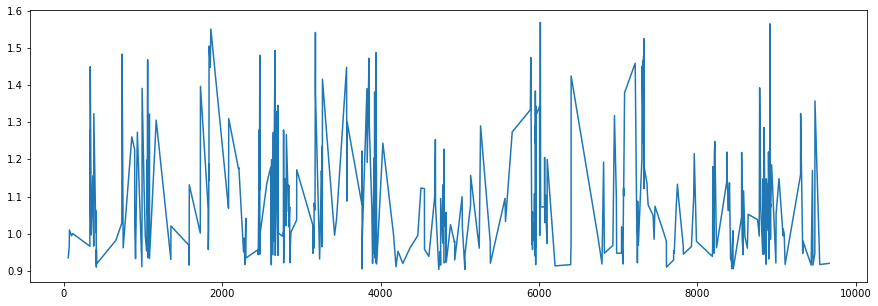

In [146]:
plt.figure(figsize=(15, 5))
resultados[resultados['entropia']> 0.9]['entropia'].plot()

In [46]:
tabla.to_excel('resultados.xlsx', index=False)

NameError: name 'tabla' is not defined

# Febrero 2022

In [54]:
datos2 = pd.read_excel('febrero2022.xlsx')

In [59]:
datos2.head(10)

,FECHA,HORA,5MIN,30MIN,4HR,DIA,5MIN.1,30 MIN,4HR.1,DIA.1,CCI5MIN,CCI30MIN,PRECIO,CCI5MIN.1,CCI30MIN.1,RENTABILIDAD
1,2022-02-02,06:34,2,9,12,14,18,21,24,28,30,32,4568.00,-60,89,1.00
2,2022-02-02,06:35,5,9,12,14,19,21,24,28,30,32,4567.75,-46,88,0.75
3,2022-02-02,06:36,2,9,12,14,20,21,24,28,30,32,4568.00,-39,91,1.00
4,2022-02-02,06:37,2,9,12,14,18,21,24,28,30,32,4568.25,-36,92,1.25
5,2022-02-02,06:38,2,9,12,14,19,21,24,28,30,32,4567.75,-41,90,0.75
6,2022-02-02,06:39,2,9,12,14,19,21,24,28,30,32,4567.75,-41,90,0.75
7,2022-02-02,06:40,2,9,12,14,18,21,24,28,30,32,4568.75,-20,96,1.75
8,2022-02-02,06:41,2,9,12,14,20,21,24,28,30,32,4567.50,-33,91,0.50
9,2022-02-02,06:42,4,9,12,14,19,21,24,28,30,32,4567.00,-43,89,0.00
10,2022-02-02,06:43,4,9,12,14,19,21,24,28,30,32,4566.75,-50,88,-0.25


In [56]:
datos2 = datos2.dropna()

In [58]:
datos2.head(7)

,FECHA,HORA,5MIN,30MIN,4HR,DIA,5MIN.1,30 MIN,4HR.1,DIA.1,CCI5MIN,CCI30MIN,PRECIO,CCI5MIN.1,CCI30MIN.1,RENTABILIDAD
1,2022-02-02,06:34,2,9,12,14,18,21,24,28,30,32,4568.00,-60,89,1.00
2,2022-02-02,06:35,5,9,12,14,19,21,24,28,30,32,4567.75,-46,88,0.75
3,2022-02-02,06:36,2,9,12,14,20,21,24,28,30,32,4568.00,-39,91,1.00
4,2022-02-02,06:37,2,9,12,14,18,21,24,28,30,32,4568.25,-36,92,1.25
5,2022-02-02,06:38,2,9,12,14,19,21,24,28,30,32,4567.75,-41,90,0.75
6,2022-02-02,06:39,2,9,12,14,19,21,24,28,30,32,4567.75,-41,90,0.75
7,2022-02-02,06:40,2,9,12,14,18,21,24,28,30,32,4568.75,-20,96,1.75


<AxesSubplot:>

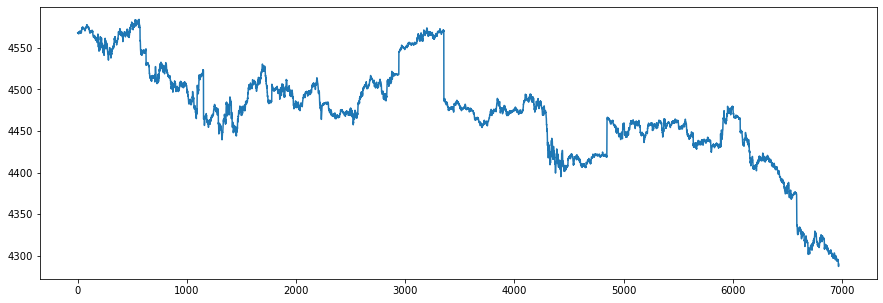

In [61]:
datos2['PRECIO'].plot(figsize=(15, 5))

In [62]:
fecha2 = datos2['FECHA']
hora2 = datos2['HORA']

In [63]:
dataset2 = datos2.drop(['FECHA', 'HORA'], axis=1)

### preparando los datos para el modelo de clasificación

In [71]:
# escalando los datos
X2_tf = scaler.transform(dataset2)

In [72]:
# aplicando el modelo de clasificación
y_pred = clf.predict(X_tf)
y_proba = clf.predict_proba(X_tf)

In [74]:
y_proba

array([[0.245, 0.71 , 0.045],
       [0.175, 0.81 , 0.015],
       [0.155, 0.835, 0.01 ],
       ...,
       [0.02 , 0.005, 0.975],
       [0.035, 0.015, 0.95 ],
       [0.02 , 0.005, 0.975]])

7       0
8       0
9       0
10      0
11      0
       ..
9987    1
9988    1
9989    1
9990    1
9991    1
Name: Unnamed: 16, Length: 9931, dtype: int64

In [92]:
y_test_proba[0:10], y_pred_test[0:10]

(array([[0.01 , 0.   , 0.99 ],
        [0.01 , 0.01 , 0.98 ],
        [0.77 , 0.115, 0.115],
        [0.765, 0.02 , 0.215],
        [0.02 , 0.395, 0.585],
        [0.025, 0.   , 0.975],
        [0.   , 0.005, 0.995],
        [0.94 , 0.04 , 0.02 ],
        [0.   , 0.03 , 0.97 ],
        [1.   , 0.   , 0.   ]]),
 array([ 1,  1, -1, -1,  1,  1,  1, -1,  1, -1], dtype=int64))

In [94]:
len(y_test_proba[:, 1])

1987

In [14]:
thresh = 0.5
print(y_test.shape, y_pred_test.shape, y_train.shape, y_pred_train.shape)

(1987,) (1987,) (7944,) (7944,)


In [15]:
target_names = ['class -1', 'class 0', 'class 1']
print(classification_report(y_train, y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

    class -1       1.00      1.00      1.00      3564
     class 0       1.00      1.00      1.00      1200
     class 1       1.00      1.00      1.00      3180

    accuracy                           1.00      7944
   macro avg       1.00      1.00      1.00      7944
weighted avg       1.00      1.00      1.00      7944



In [67]:
target_names = ['class -1', 'class 0', 'class 1']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    class -1       0.97      0.97      0.97       907
     class 0       0.92      0.93      0.93       288
     class 1       0.96      0.96      0.96       792

    accuracy                           0.96      1987
   macro avg       0.95      0.95      0.95      1987
weighted avg       0.96      0.96      0.96      1987



In [16]:
multilabel_confusion_matrix(y_train, y_pred_train)

array([[[4379,    1],
        [   0, 3564]],

       [[6744,    0],
        [   1, 1199]],

       [[4763,    1],
        [   1, 3179]]], dtype=int64)

In [17]:
multilabel_confusion_matrix(y_test, y_pred_test)

array([[[1064,   18],
        [  31,  874]],

       [[1668,   10],
        [  12,  297]],

       [[1180,   34],
        [  19,  754]]], dtype=int64)

In [18]:
# fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test, y_pred_test)
# auc_test_rf = roc_auc_score(y_test, y_pred_test)

In [19]:
# print('Random Forest Classifier')

# print('Entrenamiento:')
# rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity = print_report(y_train, y_pred_train, thresh)

# print('Test:')
# rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_test, y_pred_test, thresh)

In [20]:
# auc = roc_auc_score(y_test, y_pred_test, multi_class="ovo",average=Macro)

<AxesSubplot:>

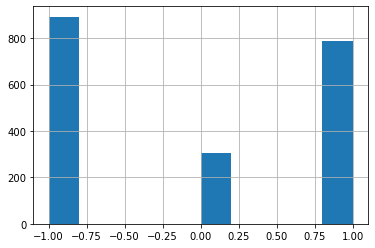

In [26]:
pd.Series(y_pred_test).hist()

In [29]:
y_train.shape, y_test.shape, y_pred_train.shape

((7944,), (1987,), (7944,))

In [35]:
result_test = pd.DataFrame()
result_train = pd.DataFrame()

array([[<AxesSubplot:title={'center':'test'}>,
        <AxesSubplot:title={'center':'pred_test'}>]], dtype=object)

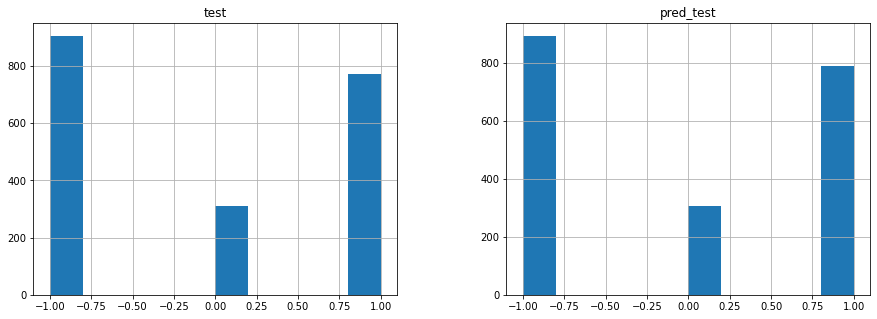

In [34]:
result_test.hist(figsize=(15,5))

array([[<AxesSubplot:title={'center':'train'}>,
        <AxesSubplot:title={'center':'pred_train'}>]], dtype=object)

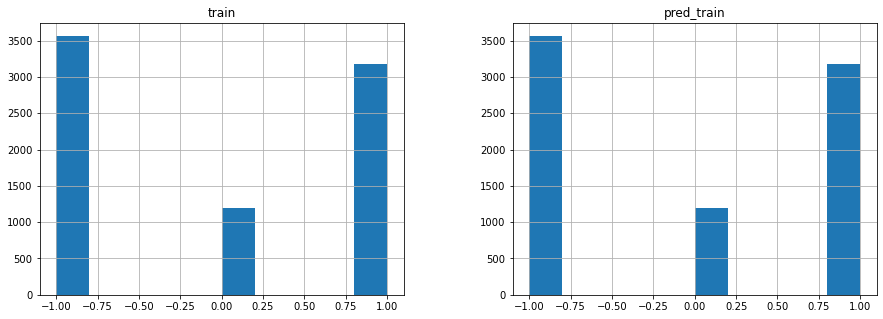

In [37]:
result_train.hist(figsize=(15,5))

In [49]:
X_test.loc[[7750, 8142, 6670, 4254, 842, 799]]

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
7750,3,6,10,14,18,21,24,27,30,32,4414.75,110,131,-354.00
8142,3,7,13,14,19,22,24,27,31,32,4412.00,-105,67,-356.75
6670,3,7,11,16,19,22,25,28,31,33,4354.25,-136,-149,-414.50
4254,5,9,11,15,18,23,25,28,31,33,4587.75,-94,-147,-181.00
842,5,9,11,17,18,22,25,28,30,32,4780.75,18,50,12.00
799,2,7,13,17,18,22,25,28,31,32,4778.50,-109,36,9.75


In [50]:
y_test.loc[[7750, 8142, 6670, 4254, 842, 799]]

7750    1
8142    1
6670   -1
4254   -1
842     0
799     0
Name: Unnamed: 16, dtype: int64

In [52]:
# normaliza los datos. tf: transformados o escalados
# X_ex = scaler.transform(X_train)
X_ex = scaler.transform(X_test.loc[[7750, 8142, 6670, 4254, 842, 799]])

# aplicación de modelo
y_ex = clf.predict(X_ex)
y_ex

array([ 1,  1, -1, -1,  0,  0], dtype=int64)

In [1]:
confusion = confusion_matrix(y_pred_test, y_test)
print('Confusion Matrix\n')
print(confusion)

NameError: name 'confusion_matrix' is not defined

In [64]:
# # GradientBoosterClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train_tf, y_train)
# Previsiones 
y_train_preds_gbc = gbc.predict(X_train_tf)
y_test_preds_gbc = gbc.predict(X_test_tf)

In [65]:
result_test_gbc = pd.DataFrame()
result_train_gbc = pd.DataFrame()

In [66]:
result_test_gbc ['test'] = y_test
result_test_gbc ['pred_test'] = y_test_preds_gbc

result_train_gbc ['train'] = y_train
result_train_gbc ['pred_train'] = y_train_preds_gbc

array([[<AxesSubplot:title={'center':'test'}>,
        <AxesSubplot:title={'center':'pred_test'}>]], dtype=object)

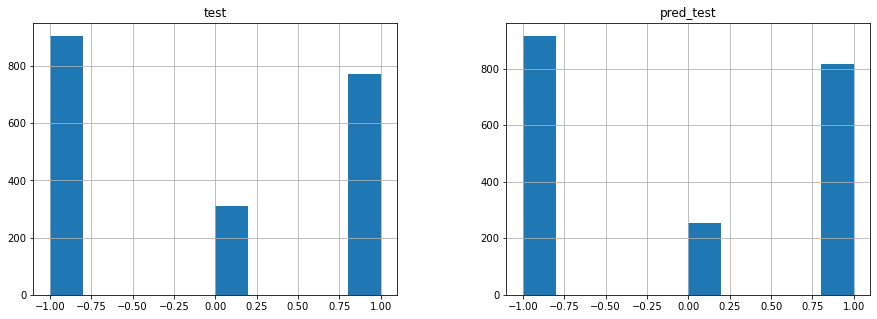

In [67]:
result_test_gbc.hist(figsize=(15, 5))

array([[<AxesSubplot:title={'center':'train'}>,
        <AxesSubplot:title={'center':'pred_train'}>]], dtype=object)

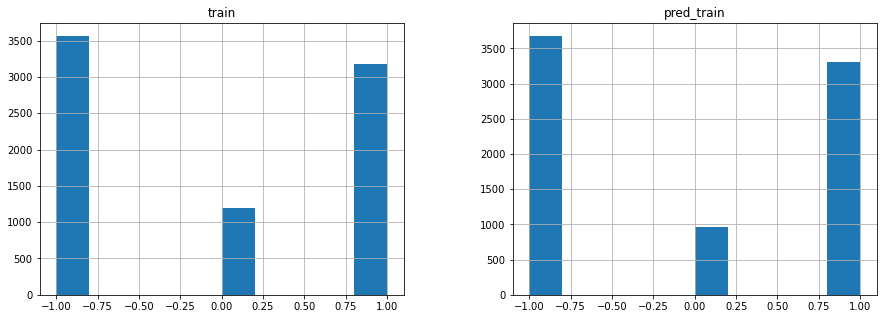

In [68]:
result_train_gbc.hist(figsize=(15, 5))

In [69]:
# normaliza los datos. tf: transformados o escalados
# X_ex = scaler.transform(X_train)
X_ex = scaler.transform(X_test.loc[[7750, 8142, 6670, 4254, 842, 799]])

# aplicación de modelo
y_ex = gbc.predict(X_ex)
y_ex

array([ 1, -1, -1, -1,  0, -1], dtype=int64)

In [70]:
y_test.loc[[7750, 8142, 6670, 4254, 842, 799]]

7750    1
8142    1
6670   -1
4254   -1
842     0
799     0
Name: Unnamed: 16, dtype: int64

In [71]:
confusion = confusion_matrix(y_test_preds_gbc, y_test)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[789  53  74]
 [ 46 190  19]
 [ 70  66 680]]


<AxesSubplot:>

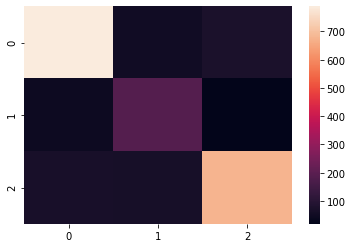

In [77]:
sn.heatmap(confusion)

In [56]:
# Función para calcular especificidad
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

# Función para generar reporte de métricas
def print_report(y_actual, y_pred, thresh):
    
#     auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('Acuracia:%.3f'%accuracy)
    print('Recall:%.3f'%recall)
    print('Precisão:%.3f'%precision)
    print('Especificidade:%.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [ ]:
def entropy(probs):
    